In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

np.set_printoptions(precision=2)
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')

In [21]:
#Loading the data
def load_house_data():
    data = np.loadtxt("./houses.txt", delimiter=",", skiprows=1)
    X = data[:, :4]
    y = data[:, 4]
    return X, y

X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
print(f"X_train.shape: {X_train.shape} \ny_train.shape: {y_train.shape}")

X_train.shape: (99, 4) 
y_train.shape: (99,)


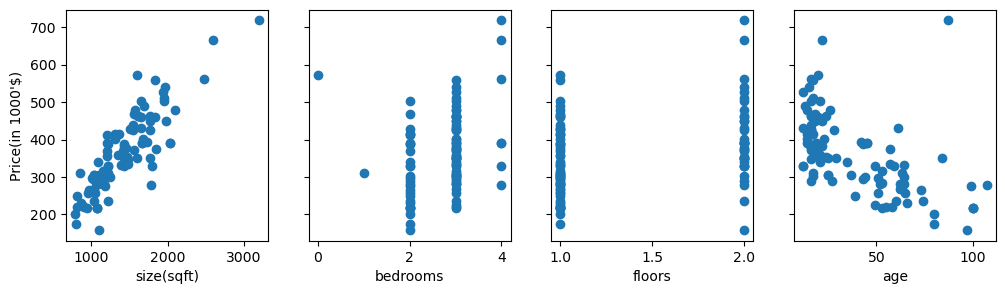

In [23]:
#plotting the features as scatter plot w.r.to the target
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(axes)):
    axes[i].scatter(X_train[:, i], y_train)
    axes[i].set_xlabel(X_features[i])
axes[0].set_ylabel("Price(in 1000'$)")
plt.show()

#Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. 
#Below, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. 
#Newer houses have higher prices than older houses.

In [52]:
def calculate_cost(X, y, w, b):
    """
    Computed the cost function
    Args:
    X (ndarray, (m,n)): Data, m examples with n features
    y (ndarray, (m,)) : Target values
    w (ndarray, (n,)) : Model parameters
    b (scalar)        : Model parameters
    
    Returns:
    cost (scalar)     : cost
    
    """
    m = X.shape[0]
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i],w) + b       
#         cost = cost + (f_wb_i - y[i])**2              
#     cost = cost/(2*m)                                 
#     return(np.squeeze(cost))

    # calculate f_wb for all examples.
    f_wb = X @ w + b  
    # calculate cost
    total_cost = (1/(2*m)) * np.sum((f_wb-y)**2)
    return total_cost

# def compute_gradient_matrix(X, y, w, b): 
#     """
#     Computes the gradient for linear regression 
 
#     Args:
#       X : (array_like Shape (m,n)) variable such as house size 
#       y : (array_like Shape (m,1)) actual value 
#       w : (array_like Shape (n,1)) Values of parameters of the model      
#       b : (scalar )                Values of parameter of the model      
#     Returns
#       dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
#       dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
                                  
#     """
#     m,n = X.shape
#     f_wb = X @ w + b              
#     e   = f_wb - y                
#     dj_dw  = (1/m) * (X.T @ e)    
#     dj_db  = (1/m) * np.sum(e)    
        
#     return dj_db,dj_dw


def calculate_gradient(X, y, w, b):
    """
    Computes the gradients for linear regression
    Args:
    X (ndarray (m,n)): Data, m examples with n features
    y (ndarray (m,)) : target values
    w (ndarray (n,)) : model parameters  
    b (scalar)       : model parameter
    
    Returns:
    dj_dw (ndarray, (n,)) : The gradient of the cost w.r.to. the parameters w.
    dj_db (scalar) : The gradient of the cost w.r.to. the parameters b.
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err_i = (np.dot(X[i], w) + b) - y[i]
        dj_db = dj_db + err_i
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, calculate_cost, calculate_gradient, alpha=1e-6, num_iters=1000):
    """
    Find the parameters w and b that minimises the cost using gradient descent
    Args:
    X(ndarray, (m, n)): Data, with m examples and n features
    y(ndarray, (m,))  : Target values
    w(ndarray, (n,))  : Model Parameters
    b(scalar)         : Model Parameters
    calculate_cost    : function to calculate the cost
    calculate gradient: function to calculate the gradients of parameter w and b
    alpha             : Learning rate
    num_iters         : Iterations to run the gradient descent
    
    Returns:
    hist(dict, (params, gradients, iterations, cost)) :
    w(ndarray, (n,)): Updated values of parameters of the model after
                      running gradient descent
      b(scalar)     : Updated value of parameter of the model after
                      running gradient descent
    """
    m, n = X.shape
    w = copy.deepcopy(w)
    b = b
    hist = {}
    hist['cost'] = []
    hist['iters'] = []
    hist['params'] = []
    hist['grads'] = []
    save_interval = np.ceil(num_iters / 10000) # prevent resource exhaustion for long runs
    
    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
    
    for i in range(num_iters):
        
        dj_dw, dj_db = calculate_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:
            hist['cost'].append(calculate_cost(X, y, w, b))
            hist['iters'].append(i)
            hist['params'].append([w, b])
            hist['grads'].append([dj_dw, dj_db])
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            cst = calculate_cost(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")
        
    print(f"w,b found by gradient descent: w: {w}, b: {b:0.2f}")
    return w, b, hist

In [53]:
#set alpha to 9.9e-7 = 9.9 * 10^-7 = 0.00000099 #9.55884e+04 = 9.55884 * 10^4 = 95588.4, 128213
# https://www.calculatorsoup.com/calculators/math/scientific-notation-converter.php
m, n = X_train.shape
w = np.zeros((n,))
b = 0.0
_, _, hist = gradient_descent(X_train, y_train, w, b, calculate_cost, calculate_gradient, alpha = 9.9e-7, num_iters=10)

#It appears the learning rate is too high. The solution does not converge. Cost is increasing rather than decreasing. w and dj_dw is alternatively positive and negative

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

[[ 5.46e-01  9.96e-04  5.13e-04  1.23e-02]
 [-8.77e-02 -1.74e-04 -1.00e-04 -3.41e-03]
 [ 6.48e-01  1.17e-03  5.94e-04  1.34e-02]
 [-2.06e-01 -4.04e-04 -2.30e-04 -7.54e-03]
 [ 7.85e-01  1.41e-03  7.09e-04  1.53e-02]
 [-3.65e-01 -7.09e-04 -3.98e-04 -1.26e-02]
 [ 9.70e-01  1.73e-03  8.69e-04  1.83e-02]
 [-5.79e-01 -1.12e-03 -6.19e-04 -1.90e-02]
 [ 1.22e+00  2.18e-03  1.09e-03  2.29e-02]
 [-8.68e-01 -1.66e-03 -9.11e-04 -2.72e-02]]
[-0.95 -0.82 -0.69 -0.56 -0.44 -0.31 -0.18 -0.05  0.08  0.21  0.33  0.46
  0.59  0.72  0.85  0.98  1.1   1.23  1.36  1.49]
[1611824.549633791, 1289531.6718691087, 1003156.8232388751, 752700.0037430899, 538161.2133817528, 359540.45215486444, 216837.72006242463, 110053.01710443328, 39186.34328089025, 4237.698591795741, 5207.083037149717, 42094.49661695209, 114899.939331203, 223623.4111799024, 368264.91216305, 548824.4422806463, 765302.0015326911, 1017697.5899191845, 1306011.2074401265, 1630242.8540955167]


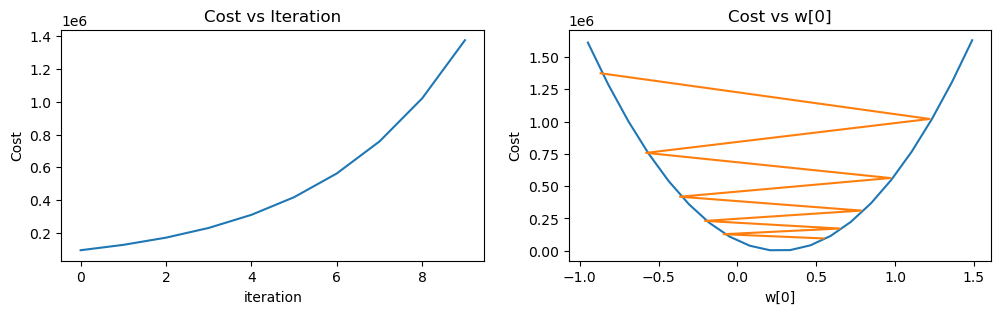

In [61]:
#plotting the cost vs w0 (keeping w1, w2, w3 arbitrary constants), cost vs iteration(learning curve)
def plot_cost_i_w(X, y, hist):
    ws = np.array([p[0] for p in hist["params"]]) #getting w's = w0, w1, w2, w3
    print(ws)
    rng = max(abs(ws[:, 0].min()), abs(ws[:, 0].max())) #getting range from w's to plot
    wr = np.linspace(-rng+0.27, rng+0.27, 20)
    print(wr)
    cst = [calculate_cost(X, y, np.array([wr[i], -32, -67, -1.46]), 221) for i in range(len(wr))] #calculatin cost keeping reaming w's constant except w0 for easy visualisation and comprehension
    print(cst)
    fig,ax = plt.subplots(1, 2, figsize=(12, 3))
    
    ax[0].plot(hist["iters"], (hist["cost"]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(ws[:, 0], hist["cost"]) #gradient overshooting in orange
    plt.show()

plot_cost_i_w(X_train, y_train, hist)

#The plot on the right shows the value of one of the parameters, w0.
#At each iteration, it is overshooting the optimal value and as a result, cost ends up increasing rather than approaching the minimum. 
#Note that this is not a completely accurate picture as there are 4 parameters being modified each pass rather than just one. 
#This plot is only showing with the other parameters fixed at benign values. 
#In this and later plots you may notice the blue and orange lines being slightly off.

In [92]:
#set alpha to 9e-7
m, n = X_train.shape
w = np.zeros((n,))
b = 0.0
_, _, hist = gradient_descent(X_train, y_train, w, b, calculate_cost, calculate_gradient, alpha = 9e-7, num_iters=10)

#Cost is decreasing throughout the run showing that alpha is not too large.

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

[[ 4.97e-01  9.05e-04  4.67e-04  1.12e-02]
 [ 1.78e-02  2.08e-05  2.01e-06 -7.88e-04]
 [ 4.79e-01  8.62e-04  4.35e-04  9.55e-03]
 [ 3.44e-02  3.93e-05  2.82e-06 -1.60e-03]
 [ 4.64e-01  8.21e-04  4.05e-04  7.96e-03]
 [ 4.98e-02  5.57e-05  2.53e-06 -2.45e-03]
 [ 4.49e-01  7.82e-04  3.76e-04  6.41e-03]
 [ 6.41e-02  7.01e-05  1.21e-06 -3.31e-03]
 [ 4.35e-01  7.45e-04  3.48e-04  4.88e-03]
 [ 7.74e-02  8.27e-05 -1.06e-06 -4.20e-03]]
[-0.23 -0.17 -0.12 -0.07 -0.02  0.03  0.09  0.14  0.19  0.24  0.3   0.35
  0.4   0.45  0.51  0.56  0.61  0.66  0.71  0.77]
[265442.8627250738, 212194.42564371933, 164906.35826441954, 123578.66058717453, 88211.33261198427, 58804.37433884878, 35357.78576776802, 17871.566898742047, 6345.717731770827, 780.2382668543646, 1175.1285039926572, 7530.388443185706, 19846.01808443354, 38122.017427736115, 62358.38647309346, 92555.12522050561, 128712.2336699724, 170829.711821494, 218907.5596750703, 272945.7772307015]


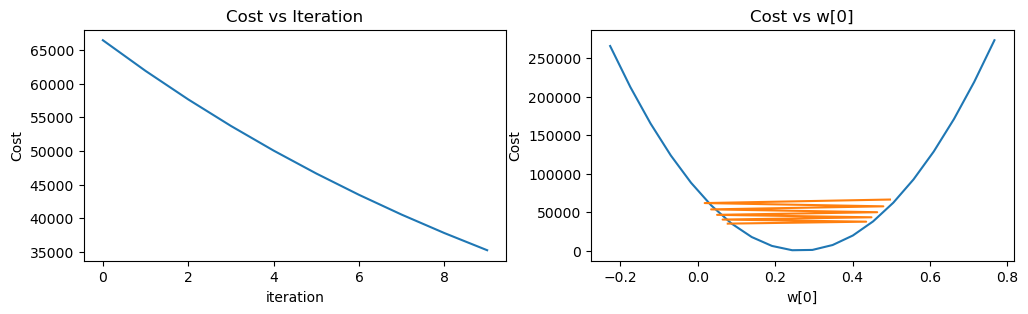

In [64]:
plot_cost_i_w(X_train, y_train, hist)

#On the left, you see that cost is decreasing as it should. On the right, 
#you can see that w0 is still oscillating around the minimum, but it is decreasing each iteration rather than increasing. 
#Note above that dj_dw[0] changes sign with each iteration as w[0] jumps over the optimal value. This alpha value will converge.
#You can vary the number of iterations to see how it behaves.

In [93]:
#set alpha to 1e-7
m, n = X_train.shape
w = np.zeros((n,))
b = 0.0
_, _, hist = gradient_descent(X_train, y_train, w, b, calculate_cost, calculate_gradient, alpha = 1e-7, num_iters=10)

#Cost is decreasing throughout the run showing that alpha is not too large.

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

[[5.52e-02 1.01e-04 5.19e-05 1.24e-03]
 [9.83e-02 1.79e-04 9.22e-05 2.20e-03]
 [1.32e-01 2.40e-04 1.24e-04 2.93e-03]
 [1.58e-01 2.88e-04 1.48e-04 3.48e-03]
 [1.79e-01 3.25e-04 1.67e-04 3.91e-03]
 [1.95e-01 3.54e-04 1.81e-04 4.22e-03]
 [2.08e-01 3.77e-04 1.92e-04 4.45e-03]
 [2.18e-01 3.94e-04 2.01e-04 4.62e-03]
 [2.25e-01 4.07e-04 2.08e-04 4.73e-03]
 [2.31e-01 4.18e-04 2.12e-04 4.81e-03]]
[0.04 0.06 0.09 0.11 0.14 0.16 0.18 0.21 0.23 0.26 0.28 0.31 0.33 0.36
 0.38 0.4  0.43 0.45 0.48 0.5 ]
[56823.97916534423, 45372.51094019517, 35213.86268151641, 26348.03438930795, 18775.026063569796, 12494.83770430196, 7507.469311504415, 3812.920885177179, 1411.1924253202449, 302.2839319336171, 486.19540501729114, 1962.9268445712687, 4732.478250595564, 8794.849623090151, 14150.04096205504, 20798.052267490235, 28738.88353939573, 37972.53477777153, 48499.00598261768, 60318.29715393407]


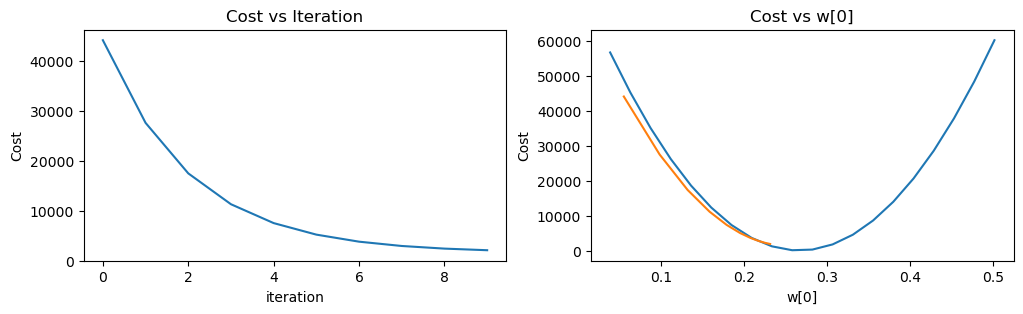

In [66]:
plot_cost_i_w(X_train, y_train, hist)

#On the left, you see that cost is decreasing as it should. 
#On the right you can see that w0 is decreasing without crossing the minimum.
#Note above that dj_w0 is negative throughout the run. This solution will also converge, though not quite as quickly as the previous example.

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
   100000 1.32286e+03  2.7e-01 -2.5e-02 -6.6e-01 -7.3e-01  7.0e-01 -2.9e-03  2.1e-01  7.2e+00  2.8e-02 -7.8e+00
   200000 1.31271e+03  2.7e-01 -4.5e-02 -1.3e+00 -7.3e-01  1.4e+00 -2.8e-03  2.3e-01  7.1e+00  2.8e-02 -7.8e+00
   300000 1.30271e+03  2.7e-01 -6.6e-02 -1.9e+00 -7.4e-01  2.1e+00 -2.8e-03  2.4e-01  7.1e+00  2.8e-02 -7.8e+00
   400000 1.29285e+03  2.7e-01 -8.8e-02 -2.6e+00 -7.4e-01  2.8e+00 -2.7e-03  2.5e-01  7.0e+00  2.8e-02 -7.8e+00
   500000 1.28312e+03  2.7e-01 -1.1e-01 -3.2e+00 -7.4e-01  3.5e+00 -2.7e-03  2.6e-01  6.9e+00  2.8e-02 -7.7e+00
   600000 1.27353e+03  2.7e-01 -1.3e-01 -3.8e+00 -7.4e-01  4.2e+00 -2.6e-03  2.7e-01  6.8e+00  2.8e-02 -

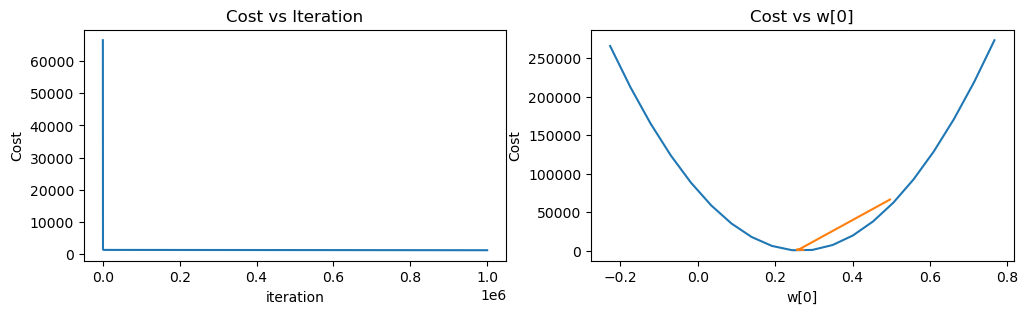

In [94]:
#set alpha to 9e-7 and iters to 100
m, n = X_train.shape
w = np.zeros((n,))
b = 0.0
_, _, hist = gradient_descent(X_train, y_train, w, b, calculate_cost, calculate_gradient, alpha = 9e-7, num_iters=1000000) #long run
plot_cost_i_w(X_train, y_train, hist)

### Feature Scaling
    The stats above shows w's are updated unevenly.
    Above, while cost is being decreased, its clear that w0 is making more rapid progress than the other parameters due to its much larger gradient.
    Above, you can see cost decreased slowly after its initial reduction. Notice the difference between w0 and w1,w2,w3 as well as dj_dw0 and dj_dw1-3. w0 reaches its near final value very quickly and dj_dw0 has quickly decreased to a small value showing that w0 is near the final value. The other parameters were reduced much more slowly

    for gradient calculation of dj_dw,
    alpha is shared by all parameter updates (w's and b).
    the common error term is multiplied by the features for the w's i.e with xij. (not b).
    the features vary significantly in magnitude making some features update much faster than others. In this case, w0 is multiplied by 'size(sqft)', which is generally > 1000, while w1 is multiplied by 'number of bedrooms', which is generally 2-4.

    The solution is Feature Scaling.

    Three different techniques:

    - Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
    - Mean normalization: (x-mu)/(max-min)
    - Z-score normalization : x - mu / sigma
    
    Implementation Note: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bed- rooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

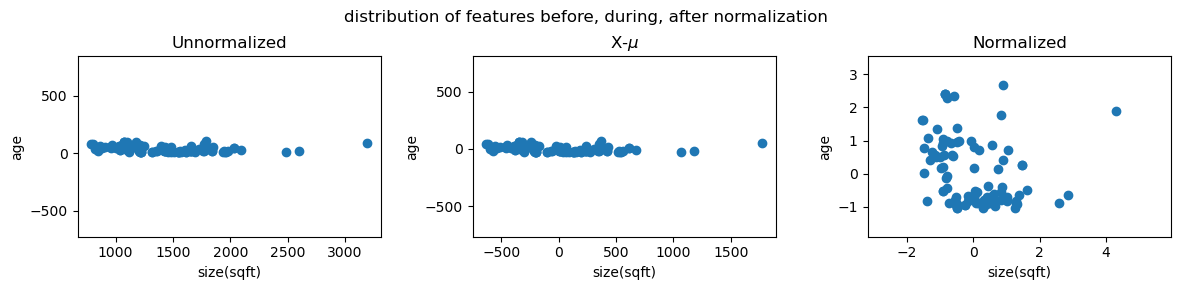

In [85]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu) / sigma

#X_features = ['size(sqft)','bedrooms','floors','age']

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].scatter(X_train[:, 0], X_train[:, 3]); axes[0].set_xlabel(X_features[0])
axes[0].set_ylabel(X_features[3])
axes[0].set_title("Unnormalized")
axes[0].axis("equal")

axes[1].scatter(X_mean[:, 0], X_mean[:, 3]); axes[1].set_xlabel(X_features[0])
axes[1].set_ylabel(X_features[3])
axes[1].set_title(r"X-$\mu$")
axes[1].axis("equal")

axes[2].scatter(X_norm[:, 0], X_norm[:, 3]); axes[2].set_xlabel(X_features[0])
axes[2].set_ylabel(X_features[3])
axes[2].set_title(r"Normalized")
axes[2].axis("equal")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

#Left: Unnormalized: The range of values or the variance of the 'size(sqft)' feature is much larger than that of age
#Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
#Right: The second step divides by the variance. This leaves both features centered at zero with a similar scale.

In [86]:
#Let's normalize the data and compare it to the original data.
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu = np.mean(X, axis=0) # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0) # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

X_norm, mu, sigma = zscore_normalize_features(X_train)
print(f"X_mu = {mu}, \nX_sigma = {sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train, axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")
#The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 after normalization.
#ptp = max - min based on axis, otherwise max in whole - min in whole

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


481.20000000000005
0.8
0.2
19.0


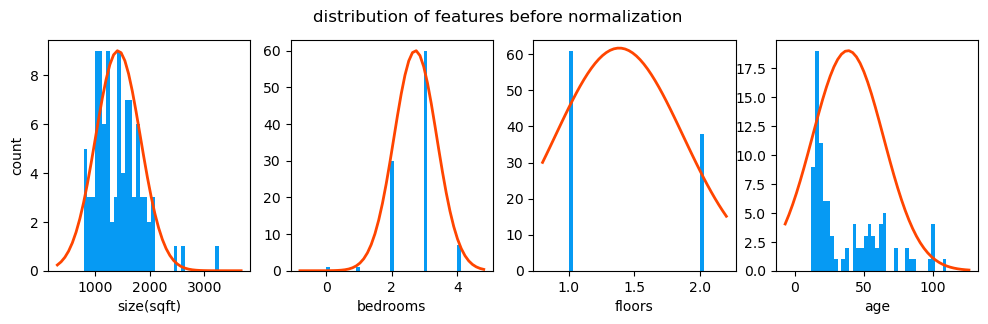

1.1690518196659183
1.2270592927488337
0.41125242747329116
0.7370660230100516


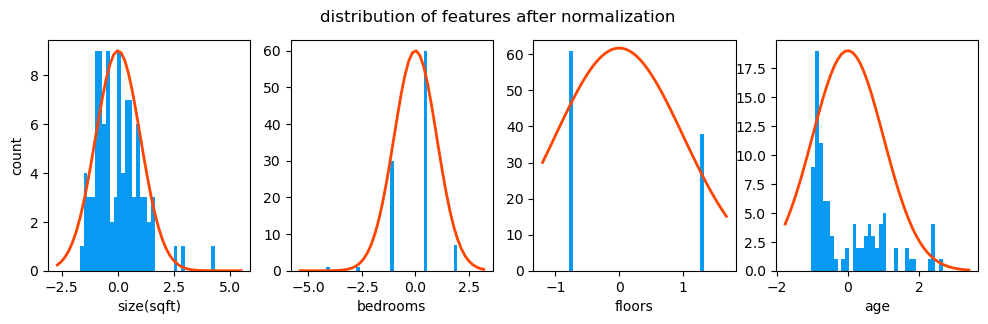

In [89]:
#Plotting of feature distribution
from scipy.stats import norm
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data)) * 0.2
    print(scale) #for each column
    x = np.linspace(np.min(data) - scale, np.max(data) + scale, 50)
    _, bins, _ = ax.hist(data, x, color="xkcd:azure")
    
    mu = np.mean(data); 
    std = np.std(data); 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax.twinx()
    axr.plot(bins, dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')
    
#Plotting of feature distribution before normalization
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_train[:, i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()

#Plotting of feature distribution after normalization
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:, i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")
plt.show()

#Notice, above, the range of the normalized data (x-axis) is centered around zero and roughly +/- 2. 
#Most importantly, the range is similar for each feature.

#Let's re-run our gradient descent algorithm with normalized data. 
#Note the vastly larger value of alpha. This will speed up gradient descent.

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.7e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

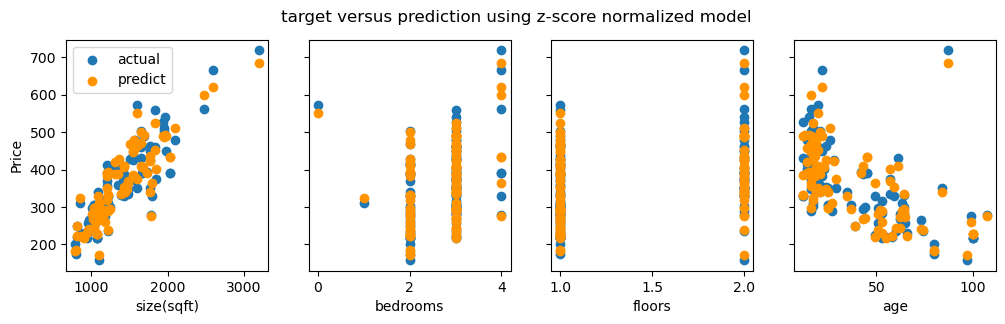

In [99]:
m, n = X_train.shape
w = np.zeros((n,))
b = 0.0
w_norm, b_norm, hist = gradient_descent(X_norm, y_train, w, b, calculate_cost, calculate_gradient, alpha = 1.0e-1, num_iters=1000)

#The scaled features get very accurate results much, much faster!. 
#Notice the gradient of each parameter is tiny by the end of this fairly short run. 
#A learning rate of 0.1 is a good start for regression with normalized features.
#Let's plot our predictions versus the target values.
#Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

#predict target using normalized features
m = X_norm.shape[0]
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = np.dot(X_norm[i], w_norm) + b_norm
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='actual')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, color=dlc["dlorange"], label='predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [100]:
#The results look good. A few points to note:
#with multiple features, we can no longer have a single plot showing results versus features.
#when generating the plot, the normalized features were used. 
#Any predictions using the parameters learned from a normalized training set must also be normalized.
#Prediction: The point of generating our model is to use it to predict housing prices that are not in the data set. 
#Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. 
#Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized.
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - mu) / sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709


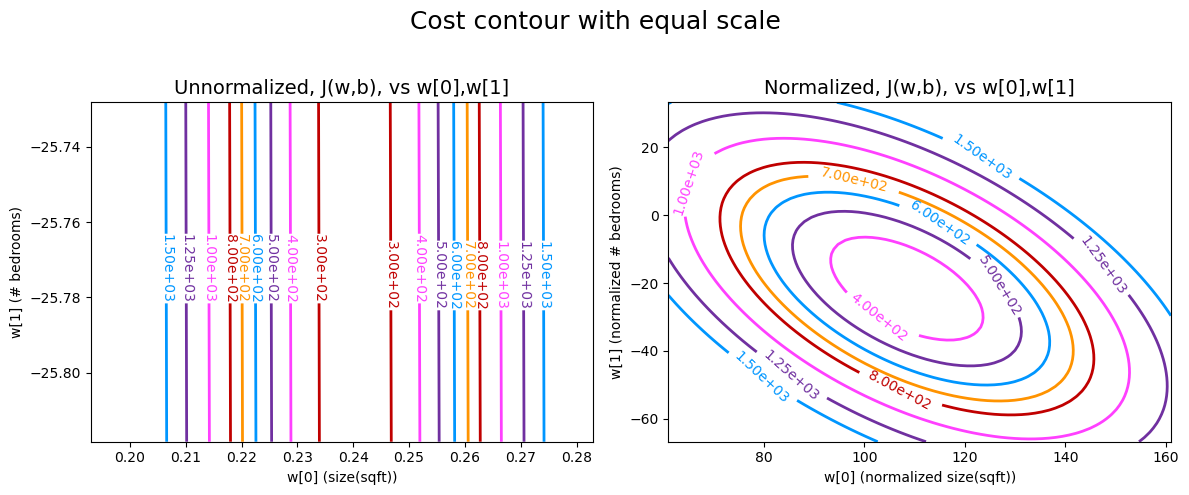

In [102]:
#Another way to view feature scaling is in terms of the cost contours.
#When feature scales do not match, the plot of cost versus parameters in a contour plot is asymmetric.
#In the plot below, the scale of the parameters is matched.
#The left plot is the cost contour plot of w[0], the square feet versus w[1], the number of bedrooms before normalizing the features.
#The plot is so asymmetric, the curves completing the contours are not visible.
#In contrast, when the features are normalized, the cost contour is much more symmetric.
#The result is that updates to parameters during gradient descent can make equal progress for each parameter.
# plots p1 vs p2. Prange is an array of entries [min, max, steps]. In feature scaling lab.
def plt_contour_multi(x, y, w, b, ax, prange, p1, p2, title="", xlabel="", ylabel=""): 
    contours = [1e2, 2e2 ,3e2, 4e2, 5e2, 6e2, 7e2, 8e2, 1e3, 1.25e3, 1.5e3, 1e4, 1e5, 1e6, 1e7]
    px, py = np.meshgrid(np.linspace(*(prange[p1])), np.linspace(*(prange[p2])))
    z = np.zeros_like(px)
    n,_ = px.shape
    for i in range(px.shape[0]):
        for j in range(px.shape[1]):
            w_ij = w
            b_ij = b
            if p1 <= 3: w_ij[p1] = px[i, j]
            if p1 == 4: b_ij = px[i, j]
            if p2 <= 3: w_ij[p2] = py[i, j]
            if p2 == 4: b_ij = py[i, j]
                
            z[i][j] = calculate_cost(x, y, w_ij, b_ij )
    CS = ax.contour(px, py, z, contours, linewidths=2,
                   colors=[dlblue, dlorange, dldarkred, dlmagenta, dlpurple]) 
    ax.clabel(CS, inline=1, fmt='%1.2e', fontsize=10)
    ax.set_xlabel(xlabel);  ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=14)

def plt_equal_scale(X_train, X_norm, y_train):
    fig,ax = plt.subplots(1, 2, figsize=(12, 5))
    prange = [
              [ 0.238-0.045, 0.238+0.045,  50],
              [-25.77326319-0.045, -25.77326319+0.045, 50],
              [-50000, 0,      50],
              [-1500,  0,      50],
              [0, 200000, 50]]
    w_best = np.array([0.23844318, -25.77326319, -58.11084634,  -1.57727192])
    b_best = 235
    plt_contour_multi(X_train, y_train, w_best, b_best, ax[0], prange, 0, 1, 
                      title='Unnormalized, J(w,b), vs w[0], w[1]',
                      xlabel= "w[0] (size(sqft))", ylabel="w[1] (# bedrooms)")
    
    w_best = np.array([111.1972, -16.75480051, -28.51530411, -37.17305735])
    b_best = 376.949151515151
    prange = [[ 111-50, 111+50,   75],
              [-16.75-50, -16.75+50, 75],
              [-28.5-8, -28.5+8,  50],
              [-37.1-16, -37.1+16, 50],
              [376-150, 376+150, 50]]
    plt_contour_multi(X_norm, y_train, w_best, b_best, ax[1], prange, 0, 1, 
                      title='Normalized, J(w,b), vs w[0], w[1]',
                      xlabel= "w[0] (normalized size(sqft))", ylabel="w[1] (normalized # bedrooms)")
    fig.suptitle("Cost contour with equal scale", fontsize=18)
    #plt.tight_layout(rect=(0,0,1.05,1.05))
    fig.tight_layout(rect=(0, 0, 1, 0.95))
    plt.show()

plt_equal_scale(X_train, X_norm, y_train)

### Feature Engineering and Polynomial Regression Overview
    
    Out of the box, linear regression provides a means of building models of the form:
            
                    fw_b(Xi) = w0x0 + w1x1 + w2x2 + w3x3 + ---- wn-1xn-1 + b
 
    What if your features/data are non-linear or are combinations of features? For example, Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters w, b in above equation to 'fit' the equation to the training data. However, no amount of adjusting of w , b in above equation will achieve a fit to a non-linear curve.


### Polynomial Features
    Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: y = 1+x^2

    You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use np.c_[..] which is a NumPy routine to concatenate arrays along the column boundary.

In [129]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

def zscore_normalize_features(X, return_ms=False):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu = np.mean(X, axis=0) # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0) # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma
    if return_ms:
        return(X_norm, mu, sigma)
    return(X_norm)

def gradient_descent(X, y, w, b, calculate_cost, calculate_gradient, alpha=1e-6, num_iters=1000):
    """
    Find the parameters w and b that minimises the cost using gradient descent
    Args:
    X(ndarray, (m, n)): Data, with m examples and n features
    y(ndarray, (m,))  : Target values
    w(ndarray, (n,))  : Model Parameters
    b(scalar)         : Model Parameters
    calculate_cost    : function to calculate the cost
    calculate gradient: function to calculate the gradients of parameter w and b
    alpha             : Learning rate
    num_iters         : Iterations to run the gradient descent
    
    Returns:
    hist(dict, (params, gradients, iterations, cost)) :
    w(ndarray, (n,)): Updated values of parameters of the model after
                      running gradient descent
      b(scalar)     : Updated value of parameter of the model after
                      running gradient descent
    """
    m, n = X.shape
    w = copy.deepcopy(w)
    b = b
    hist = {}
    hist['cost'] = []
    hist['iters'] = []
    hist['params'] = []
    hist['grads'] = []
    save_interval = np.ceil(num_iters / 10000) # prevent resource exhaustion for long runs
    
    for i in range(num_iters):
        
        dj_dw, dj_db = calculate_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:
            hist['cost'].append(calculate_cost(X, y, w, b))
            hist['iters'].append(i)
            hist['params'].append([w, b])
            hist['grads'].append([dj_dw, dj_db])
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            cst = calculate_cost(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist

def run_gradient_descent(X, y, alpha=1e-6, num_iters=1000):
    m, n = X.shape
    w = np.zeros((n,))
    b = 0.0
    w_out, b_out, hist = gradient_descent(X, y, w, b, calculate_cost, calculate_gradient, alpha=alpha, num_iters=num_iters) #long run
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    return(w_out, b_out)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


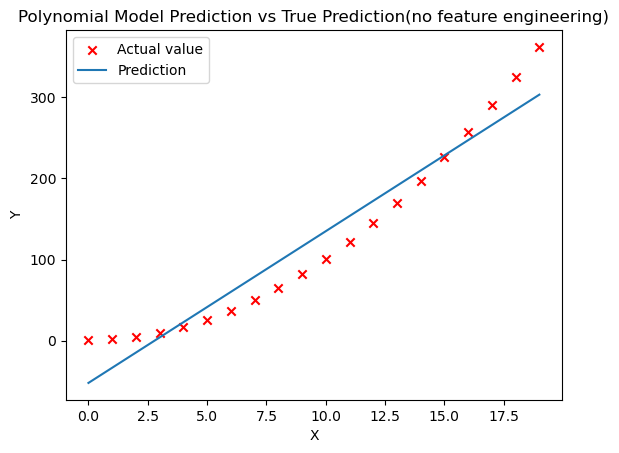

In [131]:
#non linear function y without feature normalization
X = np.arange(0, 20, 1)
y = 1 + X**2

X = X.reshape(-1, 1)
w_out, b_out = run_gradient_descent(X, y, alpha=1e-2, num_iters=1000,)

#plotting
plt.scatter(X, y, marker='x', c='r', label='Actual value'); plt.title("Polynomial Model Prediction vs True Prediction(no feature engineering)")
plt.plot(X, X @ w_out + b_out, label='Prediction'); plt.xlabel("X"); plt.ylabel("Y"); plt.legend()
plt.show()

#Well, as expected, not a great fit. The prediction is not fitting the data properly. Can be seen from the graph.
#What is needed is something like y = w0.x0^2 + b, or a polynomial feature. 
#To accomplish this, you can modify the input data to engineer the needed features.
#If you swap the original data with a version that squares the x value, then you can achieve y = w0.x0^2 + b.
#Let's try it. Swap X for X**2 in the below cell

Iteration         0, Cost: 7.32922e+03
Iteration     10000, Cost: 2.07057e-01
Iteration     20000, Cost: 1.88939e-01
Iteration     30000, Cost: 1.72406e-01
Iteration     40000, Cost: 1.57320e-01
Iteration     50000, Cost: 1.43554e-01
Iteration     60000, Cost: 1.30993e-01
Iteration     70000, Cost: 1.19531e-01
Iteration     80000, Cost: 1.09072e-01
Iteration     90000, Cost: 9.95276e-02
w,b found by gradient descent: w: [1.], b: 0.3701


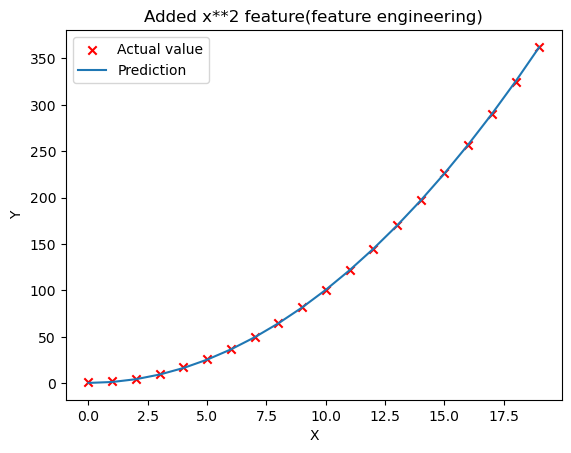

In [130]:
#Feature engineering by making the input feature of X to X**2
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2      #<-- added engineered feature

X = X.reshape(-1, 1) #X should be a 2-D Matrix

w_out, b_out = run_gradient_descent(X, y, alpha=1e-5, num_iters=100000,)

#plotting #observe we are plotting actual x , not the featured engineered x
plt.scatter(x, y, marker='x', c='r', label='Actual value'); plt.title("Added x**2 feature(feature engineering)")
plt.plot(x, X @ w_out + b_out, label='Prediction'); plt.xlabel("X"); plt.ylabel("Y"); plt.legend()
plt.show()

#Great! near perfect fit. Notice the values of w and b printed right above the graph: 
#w,b found by gradient descent: w: [1.], b: 0.0490.
#Gradient descent modified our initial values of w. b to be (1.0, 0.37) or a model of 1.0 * x0^2 + 0.37,
#very close to our target of y = 1 + x**2
#If you ran it longer, it could be a better match.

### Selecting Features
    Above, we knew that an x^2 term was required.
    It may not always be obvious which features are required.
    One could add a variety of potential features to try and find the most useful.
    For example, what if we had instead tried : y = w0x0 + w1x1^2 + w2x2^3 + b?

[[ 0  0  0]
 [ 1  1  1]
 [ 2  4  8]
 [ 3  9 27]
 [ 4 16 64]]
Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


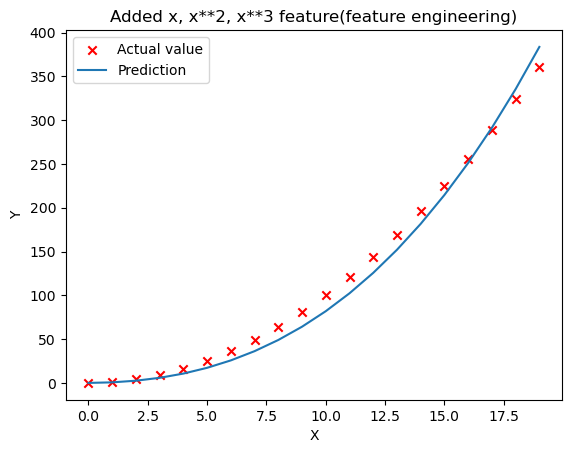

In [136]:
x = np.arange(0, 20, 1)
y = x**2

# Engineer features 
X = np.c_[x, x**2, x**3]      #<-- added engineered feature
print(X[:5])
w_out, b_out = run_gradient_descent(X, y, alpha=1e-7, num_iters=10000,)

#plotting #observe we are plotting actual x , not the featured engineered x
plt.scatter(x, y, marker='x', c='r', label='Actual value'); plt.title("Added x, x**2, x**3 feature(feature engineering)")
plt.plot(x, X @ w_out + b_out, label='Prediction'); plt.xlabel("X"); plt.ylabel("Y"); plt.legend()
plt.show()


    Note the value of w, [0.08 0.54 0.03] and b is 0.0106.This implies the model after fitting/training is:
    
    Gradient descent has emphasized the x^2 data that is the best fit to the data by increasing the w1 term relative to the others. If you were to run for a very long time, it would continue to reduce the impact of the other terms.

    Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

    Let's review this idea:

        - Intially, the features were re-scaled so they are comparable to each other
        - less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature useful in fitting the model to the data.
        - above, after fitting, the weight associated with the x^2 feature is much larger than the weights for x or x^3 as it is the most useful in fitting the data.

    An Alternate View:
    -----------------
    Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target. This is best understood with an example.

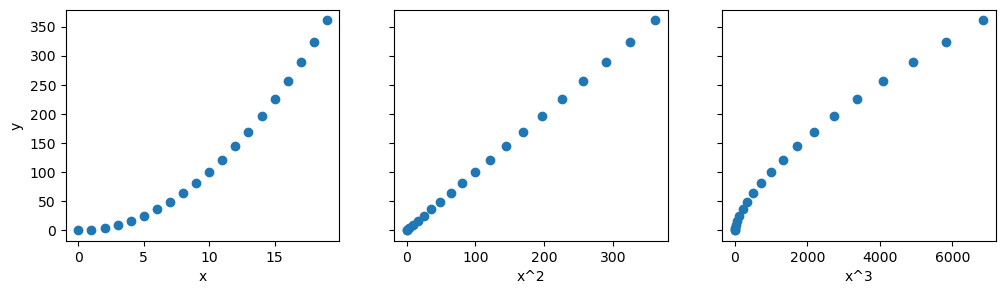

In [137]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y) #engineered features with target
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

#Below, it is clear that the feature x^2 mapped against the target value is linear.
#Linear regression can then easily generate a model using that feature.

### Scaling features
    As described in the last lab, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is x, x^2, x^3  which will naturally have very different scales. Let's apply Z-score normalization to our example.

Peak to Peak range by column in Raw X: [  19  361 6859]
Peak to Peak range by column in Normalized X: [3.3  3.18 3.28]
Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


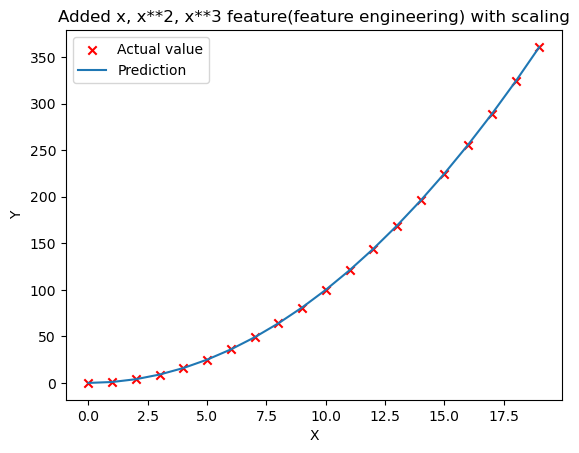

In [140]:
# create target data
x = np.arange(0, 20, 1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw X: {np.ptp(X, axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X, axis=0)}")

w_out, b_out = run_gradient_descent(X, y, alpha=1e-1, num_iters=100000,) #aggressive learning rate = 0.1

#plotting #observe we are plotting actual x , not the featured engineered x
plt.scatter(x, y, marker='x', c='r', label='Actual value'); plt.title("Added x, x**2, x**3 feature(feature engineering) with scaling")
plt.plot(x, X @ w_out + b_out, label='Prediction'); plt.xlabel("X"); plt.ylabel("Y"); plt.legend()
plt.show()

#Feature scaling allows this to converge much faster.
#Note again the values of w. The w1 term, which is the x^2 term is the most emphasized.
#Gradient descent has all but eliminated the term x^3.

### Complex Functions
    With feature engineering, even quite complex functions can be modeled:

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


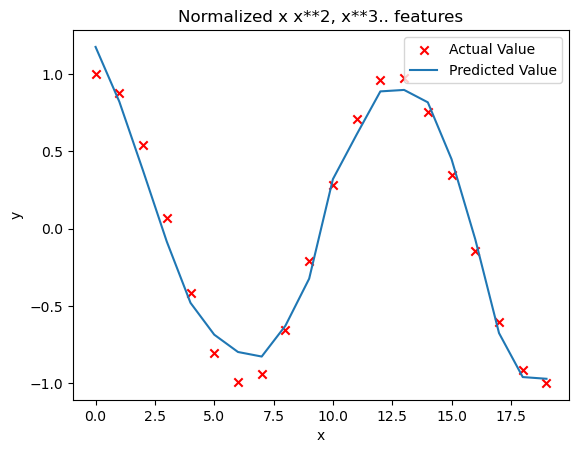

In [142]:
x = np.arange(0, 20, 1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent(X, y, alpha = 1e-1, num_iters=1000000, )

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3.. features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

X_train.shape: (99, 4) 
y_train.shape: (99,)
Peak to Peak range by column in Raw X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.845 6.135 2.056 3.685]
number of iterations completed: 106, number of weight updates: 10495.0
Model Parameters b: [363.162], weights: [109.815 -20.905 -32.288 -38.125]
prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.17  485.843 389.641 492.002]
Target values 
[300.  509.8 394.  540. ]


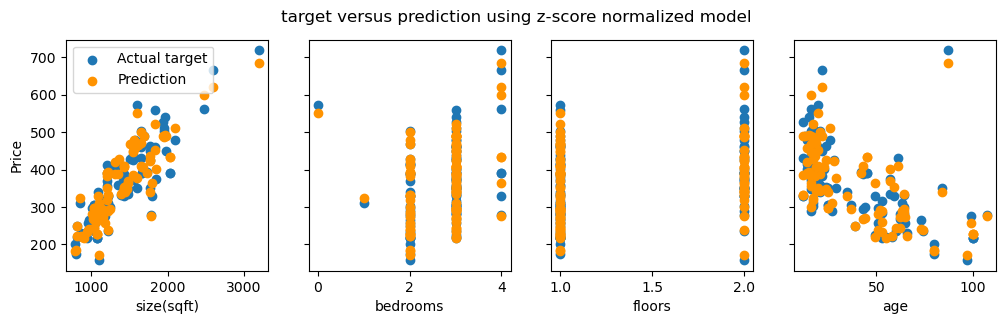

In [148]:
#Stochastic Gradient descent with z score normalised data with scikit
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3)
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
print(f"X_train.shape: {X_train.shape} \ny_train.shape: {y_train.shape}")

scalar = StandardScaler()
X_norm = scalar.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw X:{np.ptp(X_train, axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")
model = SGDRegressor(max_iter=1000)
model.fit(X_norm, y_train)
print(f"number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}")
print(f"Model Parameters b: {model.intercept_}, weights: {model.coef_}")
b_norm = model.intercept_
w_norm = model.coef_

#make predictions using model
y_pred_model = model.predict(X_norm)

#make prediction using np.dot
y_pred_dot = np.dot(X_norm, w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred_model == y_pred_dot).all()}")

print(f"Prediction on training set:\n{y_pred_dot[:4]}" )
print(f"Target values \n{y_train[:4]}")

# plot predictions and targets vs original features
#(we need to plot for each feature otherwise we get x and y should of same sixe error)  
fig, ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='Actual target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred_dot, color=dlc["dlorange"], label='Prediction')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# plt.scatter(X_train, y_train, c='r', marker='X', label="Actual values")
# plt.plot(X_train, y_pred_model, label="Prediction")
# plt.title("Actual vs Predicted using scikit")
# plt.xlabel("X"); plt.ylabel("Y")
# plt.legend(); plt.show()

X_train.shape: (99, 4) 
y_train.shape: (99,)
Peak to Peak range by column in Raw X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.845 6.135 2.056 3.685]
Model Parameters b: 363.1560808080808, weights: [110.56  -21.267 -32.707 -37.97 ]
prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.176 485.978 389.524 492.147]
Target values 
[300.  509.8 394.  540. ]


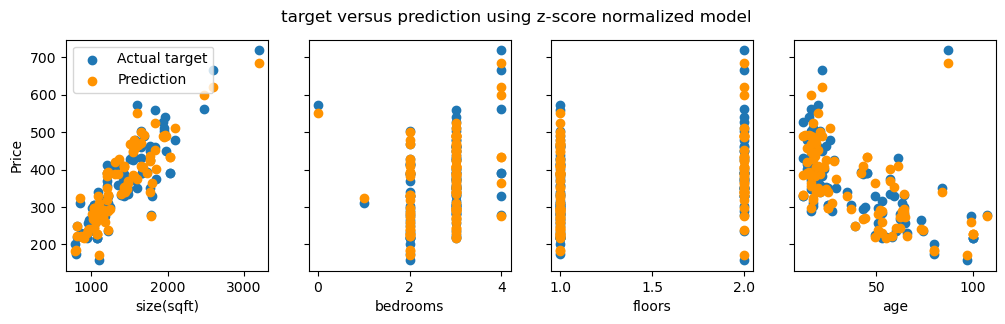

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $131420318.15


In [152]:
#Linear Regression with z score normalised data with scikit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3)
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
print(f"X_train.shape: {X_train.shape} \ny_train.shape: {y_train.shape}")

scalar = StandardScaler()
X_norm = scalar.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw X:{np.ptp(X_train, axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")
model = LinearRegression()
model.fit(X_norm, y_train)
print(f"Model Parameters b: {model.intercept_}, weights: {model.coef_}")
b_norm = model.intercept_
w_norm = model.coef_

#make predictions using model
y_pred_model = model.predict(X_norm)

#make prediction using np.dot
y_pred_dot = np.dot(X_norm, w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred_model == y_pred_dot).all()}")

print(f"Prediction on training set:\n{y_pred_dot[:4]}" )
print(f"Target values \n{y_train[:4]}")

# plot predictions and targets vs original features
#(we need to plot for each feature otherwise we get x and y should of same sixe error)  
fig, ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='Actual target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred_dot, color=dlc["dlorange"], label='Prediction')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

#prediction
x_house = np.array([1200, 3, 1, 40]).reshape(-1, 4) #input array must be 2D always
x_house_predict = model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")